In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


LOGDIR = Path(
    '/home/michal/studia/machine_learning_lab/'
    'NEAT/logs_neat_vs_rl'
)

AC_LOGDIR = LOGDIR / 'a2c'
BASELINE_AC_LOGDIR = LOGDIR / 'baseline_a2c'
NEAT_LOGDIR = LOGDIR / 'neat'


def load_neat_logs(logdir):
    paths = logdir.rglob('*population.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path)
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


def load_ac_logs(logdir):
    paths = logdir.rglob('*actor_critic.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path)
        df = df[df['fitness'] != 0]
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


import numpy as np
def plot_environment(group, label):
    sns.lineplot(
        x='num_frames',
        y='fitness',
        data=group,
        label=label,
    )

In [2]:
df = load_neat_logs(LOGDIR)
max_fitness_df = pd.DataFrame(df.groupby(['env', 'num_frames', 'start_time'])['fitness'].max())
neat_groups = max_fitness_df.groupby('env')
ac_groups = load_ac_logs(AC_LOGDIR).groupby('env')
ac_baseline_groups = load_ac_logs(BASELINE_AC_LOGDIR).groupby('env')

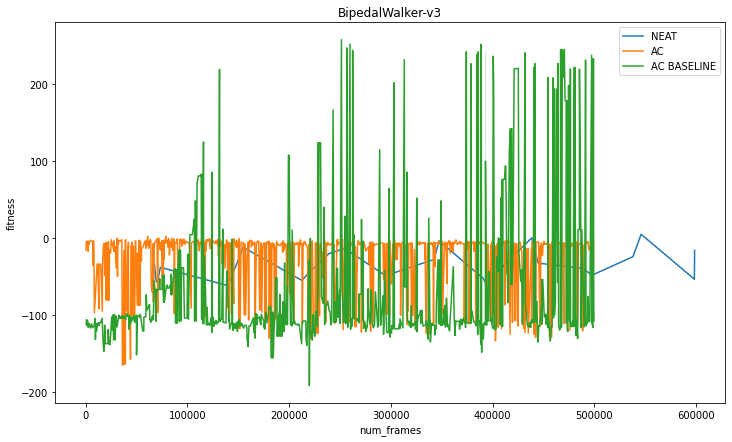

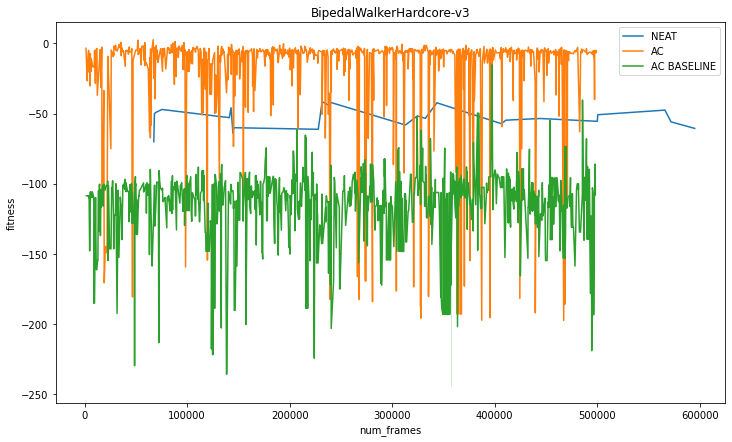

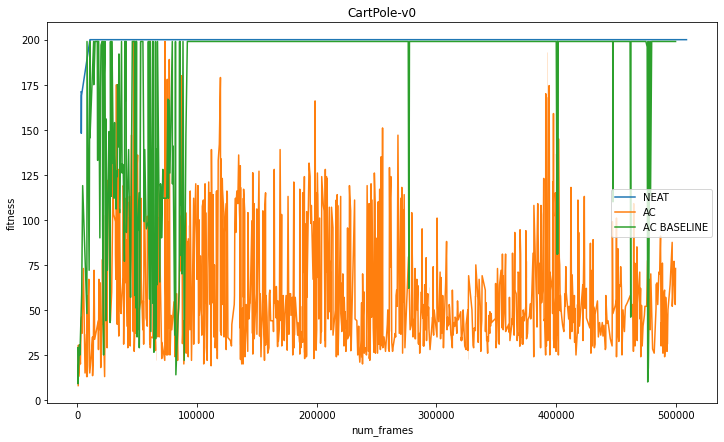

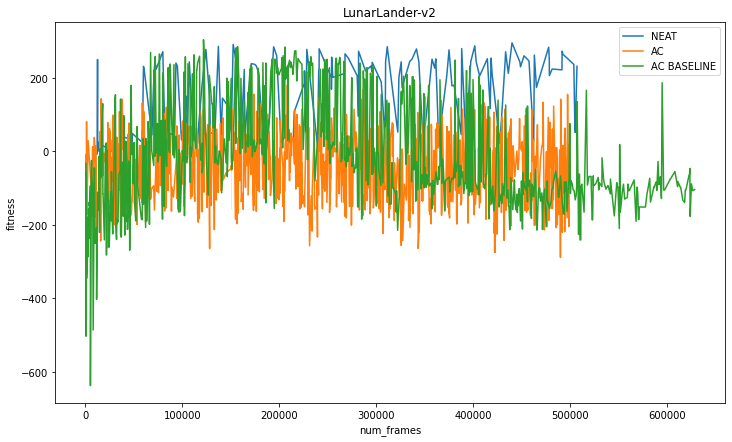

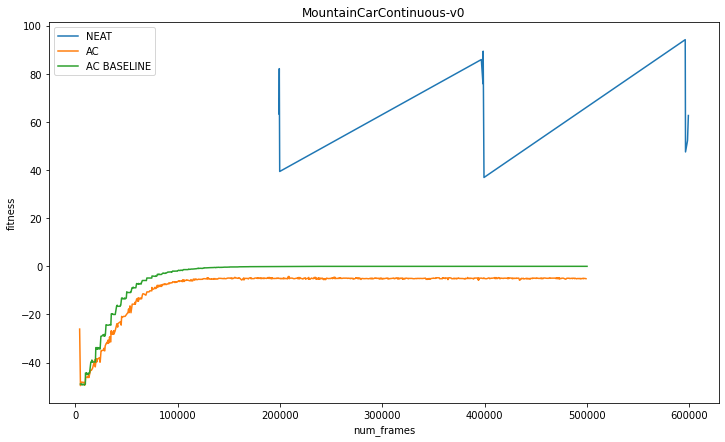

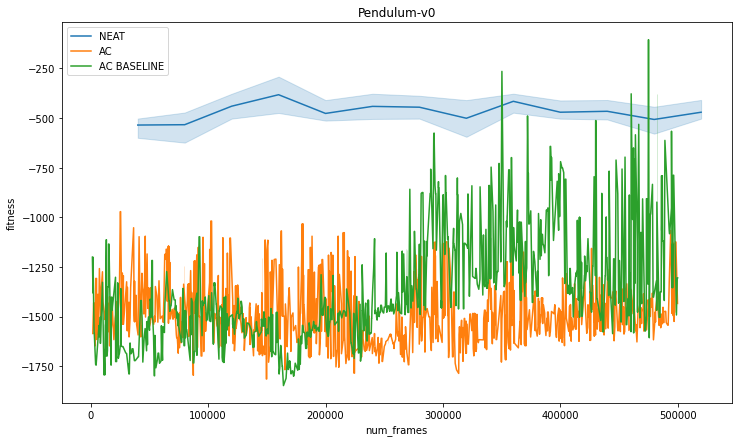

In [3]:
i = 0
for name, group1 in neat_groups:
    try:
        group2 = ac_groups.get_group(name)
        group3 = ac_baseline_groups.get_group(name)
    except KeyError:
        continue
    group2 = group2.sample(1000)
    group3 = group3.sample(1000)

    plt.figure(figsize=(12, 7))
    plt.title(name)
    plot_environment(group1, 'NEAT')
    plot_environment(group2, 'AC')
    plot_environment(group3, 'AC BASELINE')
    i+=1
    plt.show()